# GPU Hello World

### Task 3

1. Make a NumPy matrix
2. Install, import and initialize PyCUDA
3. Make a GPU matrix
4. Copy the NumPy matrix data to the GPU
5. Write a GPU *kernel* that does some kind of computation on an input matrix
6. Copy the result back to the CPU
7. Print and plot both matrices

### Solution 3

In [1]:
!nvidia-smi

Thu Jan 23 16:17:04 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%%time
!pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2024.1.2-cp311-cp311-linux_x86_64.whl size=660362 sha256=2ad6057a43edcb3aa86316b68a6e4e920f8aedbd58a75981f0441e2a8137f26c
  Stored in directory: /root/.cache/pip/wheels/76/66/50/c65e6116d7e0e16abe0f7c19b50327f76724ccfefbdc61a1b9
Successfully built pycuda
CPU times: user 657 ms, sys: 105 ms, total: 762 ms
Wall time: 2min 20s


<-- see `hello_world_pycuda_solution.ipynb`

/usr/local/lib/python3.11/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: device_allocation in out-of-thread context could not be cleaned up
  globals().clear()
/usr/local/lib/python3.11/dist-packages/google/colab/_variable_inspector.py:27: UserWarning: module in out-of-thread context could not be cleaned up
  globals().clear()


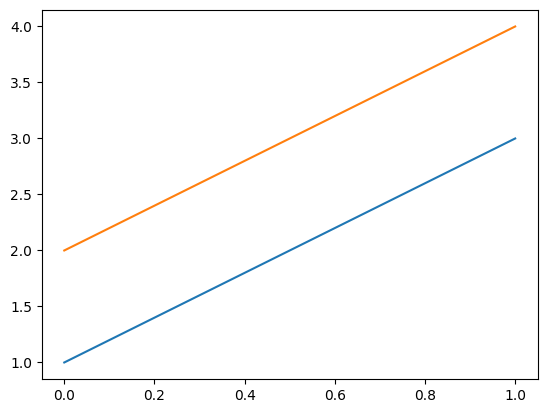

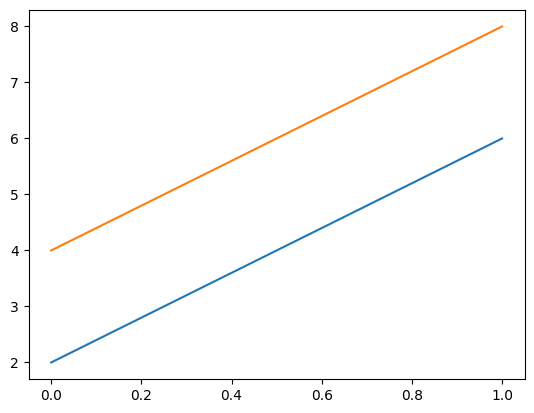

In [9]:
import numpy as np
import pycuda.driver as cuda
from pycuda.compiler import SourceModule
import matplotlib.pyplot as plt

matrix = np.matrix('1 2; 3 4')

cuda.init()

dev = cuda.Device(0)

ctx = dev.make_context()

matrix_gpu = cuda.mem_alloc(matrix.size * matrix.dtype.itemsize)

cuda.memcpy_htod(matrix_gpu, matrix)

mod = SourceModule("""
  __global__ void doublify(float *a){
      int idx = threadIdx.x + threadIdx.y*4;
      a[idx] *= 2;
    }
""")

doublify = mod.get_function("doublify")

doublify(matrix_gpu, block=(4,4,1))

matrix_doubled = np.empty_like(matrix)
cuda.memcpy_dtoh(matrix_doubled, matrix_gpu)

plt.plot(matrix)

plt.show()

plt.plot(matrix_doubled)
plt.show()